# Deep Deterministic Policy Gradient: DDPG
This notebook is an implementation of the DDPG algorithm to solve the Reacher environment. You can find
an explanation of DDPG in this [paper](https://arxiv.org/abs/1509.02971)
and an explanation of the Reacher enviornment [here](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Learning-Environment-Examples.md).

## 1. Import/Setup all necessary packages and variables
If you have any trouble importing these packages make sure you check the README file and have all the necessary dependencies.

In [1]:
from unityagents import UnityEnvironment
from agents import DDPG
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

#-------- Setup Notebook Variables ---------#
PATH = "C:\Dev\Python\RL\\Udacity_Continuous_Control"
train = False # True trains new agent, False uses already trained agent
watch_untrained = True
view_results = True
watch_trained = True


## 2. Setup the Environment
Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.
**Note:** `file_name` parameter must match the location of the Unity environment that you downloaded.

In [2]:
env = UnityEnvironment(file_name='C:\Dev\Python\RL\\Udacity_Continuous_Control\Reacher_Windows_x86_64_multiple\Reacher.exe')
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## 3. Watch Untrained Agent
This section shows you what the untrained agents looks like performing in the environment. If you do not want to watch
the untrained agents set `watch_untrained = false` in section 1.

In [6]:
def watch_untrained(agent, env, brain_name):
    """ Watch an untrained agent interact in a specific environment

    :param agent: The untrained agent
    :param env: The Unity environment the agent takes actions in
    :param brain_name: Brain of the environment
    """
    # Setup
    env_info = env.reset(train_mode=False)[brain_name]
    states = env_info.vector_observations
    # Run the simulation
    for t in range(200):
        actions = agent.act(states, agent.epsilon, add_noise=False)
        env_info = env.step(actions)[brain_name]
        next_states, dones = env_info.vector_observations, env_info.local_done
        states = next_states
        if np.any(dones):
            break

if watch_untrained:
    env_info = env.reset(train_mode=True)[brain_name]
    agent = DDPG(state_size=brain.vector_observation_space_size, action_size=brain.vector_action_space_size, num_agents=len(env_info.agents), epsilon=0, random_seed = 2)
    watch_untrained(agent, env, brain_name)



## 4. Setup and Train the Agent
This section trains the agent. If you do not want to train the agent and only wish to see the result of training an agent and watch an already trained agent then set
`train = false` in section 1.

In [4]:
if train:
    env_info = env.reset(train_mode=True)[brain_name]
    ddpg_agent = DDPG(state_size=brain.vector_observation_space_size, action_size=brain.vector_action_space_size, num_agents=len(env_info.agents), epsilon=1, random_seed = 2)
    ddpg_agent.train(env, brain_name)


## 5. View the Results of Training

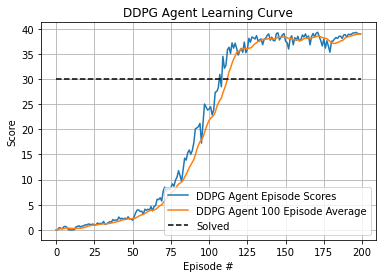

In [6]:
def graph_results(scores_filename, avgScores_filename, save_graph = True):
    """ Graph results from training an Agent

    :param scores_filename: filepath with episode scores
    :param avgScores_filename: filepath with average (per 100) episode scores
    :param save_graph: Bool for saving or just viewing graph
    """
    # Read in scores from the files
    with open(scores_filename) as f:
        scores = [round(float(score),2) for score in f.read().splitlines()]
    with open(avgScores_filename) as f:
        avg_scores = [round(float(score),2) for score in f.read().splitlines()]

    # Graph results
    fig, ax = plt.subplots()
    ax.set(xlabel="Episode #", ylabel="Episode Scores", title="DDPG Agent Learning Curve")
    ax.grid()
    ax.plot(np.arange(len(scores)), scores, label="Episode Scores")
    ax.plot(np.arange(len(avg_scores)), avg_scores, label="100 Episode Average")
    ax.plot(np.arange(len(scores)), np.ones(len(scores))*30, color="black", linestyle="dashed", label="Solved")
    ax.legend()
    # Save graph results
    if save_graph:
        fig.savefig(f'{PATH}\images\DDPG_Agent_Multiple.png')
    plt.show()

if view_results:
    graph_results(f'{PATH}\scores\DDPG_Agent_Multiple_Scores.txt',
                  f'{PATH}\scores\DDPG_Agent_Multiple_AvgScores.txt')


## 6. Watch the Trained Agent
This section shows you what the trained agents looks like performing in the environment. If you do not want to watch the
trained agents set `watch_trained = false` in section 1.

In [7]:
def watch_trained(agent, env, brain_name):
    """ Watch a trained agent interact in the environment. This agent will load the most recent checkpoints in checkpoints directory.

    :param agent: Agent used to learn and interact in the environment
    :param env: Unity environment for agent to act in
    :param brain_name: Brain of environment
    """
    # Load in agents trained parameters
    agent.actor_local.load_state_dict(torch.load(f'{PATH}\checkpoints\DDPG_Agent_Actor_Multiple.pth'))
    agent.critic_local.load_state_dict(torch.load(f'{PATH}\checkpoints\DDPG_Agent_Critic_Multiple.pth'))

    # Watch the trained Agent
    env_info = env.reset(train_mode=False)[brain_name]
    states = env_info.vector_observations
    for t in range(300):
        actions = agent.act(states, agent.epsilon, add_noise=False)
        env_info = env.step(actions)[brain_name]
        next_states, dones = env_info.vector_observations, env_info.local_done
        states = next_states
        if np.any(dones):
            break

if watch_trained:
    env_info = env.reset(train_mode=False)[brain_name]
    agent = DDPG(state_size=brain.vector_observation_space_size, action_size=brain.vector_action_space_size, num_agents=len(env_info.agents), epsilon=0, random_seed = 2)
    watch_trained(agent, env, brain_name)


env.close()